In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("World Happiness Report 2024.csv")
dataset

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


# Data Cleaning

In [3]:
dataset.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


''Filling Null Values''

In [5]:

dataset["Log GDP per capita"].fillna(dataset["Log GDP per capita"].mean(),inplace=True)

In [6]:
dataset["Social support"].fillna(dataset["Social support"].mean(),inplace=True)

In [7]:
dataset["Healthy life expectancy at birth"].fillna(dataset["Healthy life expectancy at birth"].mean(),inplace=True)

In [8]:
dataset["Freedom to make life choices"].fillna(dataset["Freedom to make life choices"].mean(),inplace=True)

In [9]:
dataset["Generosity"].fillna(dataset["Generosity"].mean(),inplace=True)

In [10]:
dataset["Perceptions of corruption"].fillna(dataset["Perceptions of corruption"].mean(),inplace=True)

In [11]:
dataset["Positive affect"].fillna(dataset["Positive affect"].mean(),inplace=True)

In [12]:
dataset["Negative affect"].fillna(dataset["Negative affect"].mean(),inplace=True)

In [13]:
dataset.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

# What are the basic summary statistics for each feature?

In [14]:
a = dataset.drop(columns=['year'])
a.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,5.483562,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,1.125523,1.145213,0.120877,6.750773,0.138300,0.158595,0.179913,0.105708,0.086838
min,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,4.646750,8.520145,0.744106,59.545000,0.662055,-0.108147,0.696495,0.572984,0.208656
50%,5.448725,9.491772,0.833621,64.900002,0.768694,-0.014990,0.789678,0.662318,0.263090
75%,6.323592,10.381806,0.903636,68.400002,0.860766,0.088079,0.863694,0.736519,0.325661
max,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


# Which country has the highest and lowest happiness scores ("Life Ladder")?

In [15]:
happiest_countries = dataset[['Country name', 'Life Ladder']].sort_values(by='Life Ladder', ascending=False).head(1)
least_happy_countries = dataset[['Country name', 'Life Ladder']].sort_values(by='Life Ladder', ascending=True).head(1)


In [16]:
happiest_countries

,Country name,Life Ladder
539,Denmark,8.018934


In [17]:
least_happy_countries

,Country name,Life Ladder
13,Afghanistan,1.281271


# What is the relationship between "Life Ladder" (happiness) and other factors like "Log GDP per capita"?

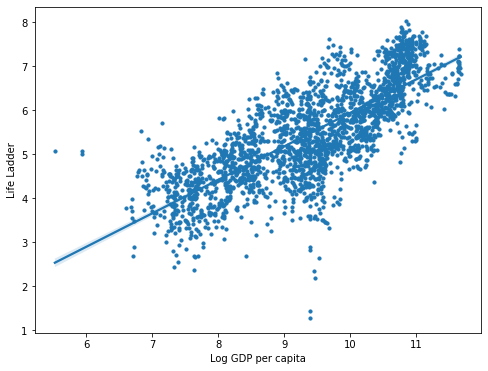

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(data=dataset, x='Log GDP per capita', y='Life Ladder',scatter_kws={'alpha':1, 's':10})
plt.show()

# What is the distribution of "Life Ladder" (happiness) across countries?

                 Country name  Life Ladder
0                     Denmark     7.664026
1                     Finland     7.624132
2                     Iceland     7.467971
3                      Norway     7.463886
4                 Netherlands     7.440393
..                        ...          ...
160                    Rwanda     3.654473
161                   Burundi     3.548124
162  Central African Republic     3.514954
163               South Sudan     3.401875
164               Afghanistan     3.219917

[165 rows x 2 columns]


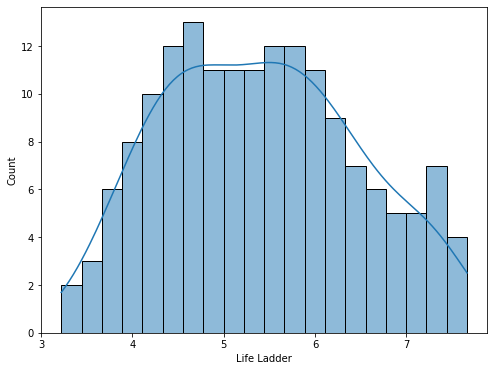

In [19]:
avg_life_ladder = dataset.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False).reset_index()
print(avg_life_ladder)
plt.figure(figsize=(8, 6))
sns.histplot(avg_life_ladder['Life Ladder'], kde=True, bins=20)
plt.show()


# How does life expectancy relate to happiness?

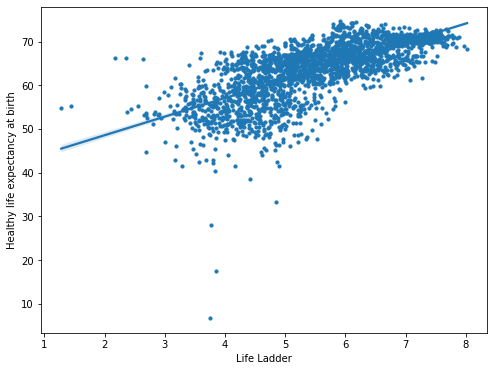

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(data=dataset, x=dataset["Life Ladder"], y=dataset["Healthy life expectancy at birth"],scatter_kws={'alpha':1, 's':10})
plt.show()

# Top 3 countries with the biggest gaps between "Generosity" and "Perceptions of corruption"

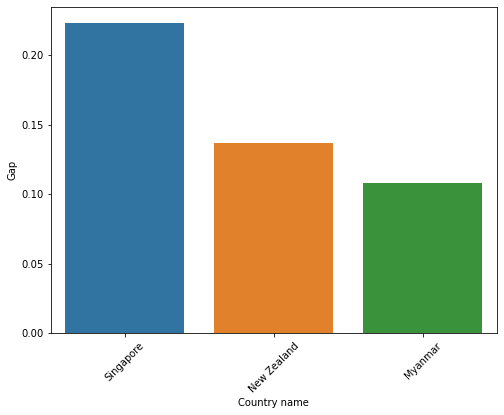

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the 'Gap' column
dataset['Gap'] = dataset['Generosity'] - dataset['Perceptions of corruption']

# Drop rows with missing values in 'Gap' to avoid issues
dataset_clean = dataset.dropna(subset=['Gap'])

# Instead of 'nlargest', let's just sort the dataset by 'Gap' and take the first 20 entries
top_3_countries = dataset_clean.sort_values(by='Gap', ascending=False).head(3)

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust size accordingly

# Creating the barplot for top 3 countries without confidence intervals (ci=None)
sns.barplot(data=top_3_countries, x='Country name', y='Gap', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# How does freedom to make life choices correlate with happiness?

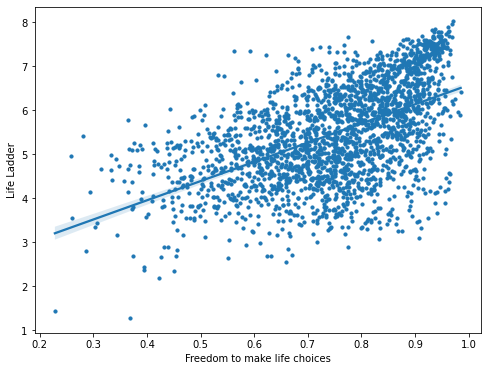

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x="Freedom to make life choices", y="Life Ladder", data=dataset,scatter_kws={'alpha':1, 's':10} )
plt.show()


# How do countries with high corruption perception perform in terms of happiness?

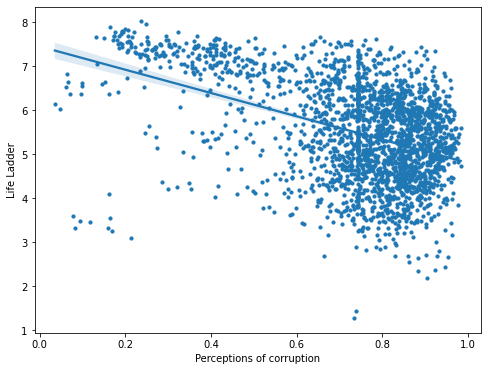

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(data=dataset, x='Perceptions of corruption', y='Life Ladder',scatter_kws={'alpha':1, 's':10})
plt.show()


# What are the trends in negative and positive affect over time?

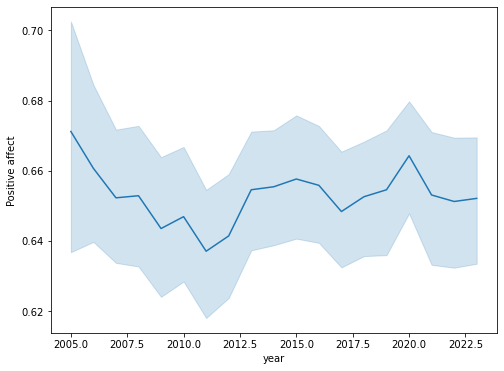

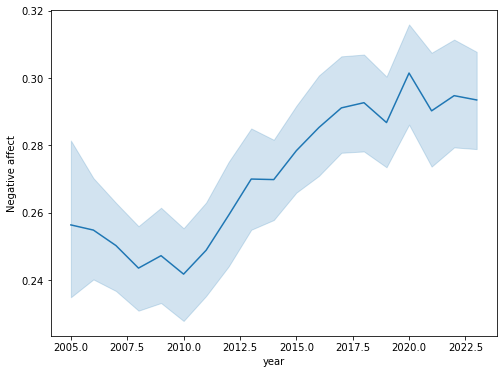

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=dataset, x='year', y='Positive affect')
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=dataset, x='year', y='Negative affect')
plt.show()



# What is the overall correlation between happiness and economic indicators globally?

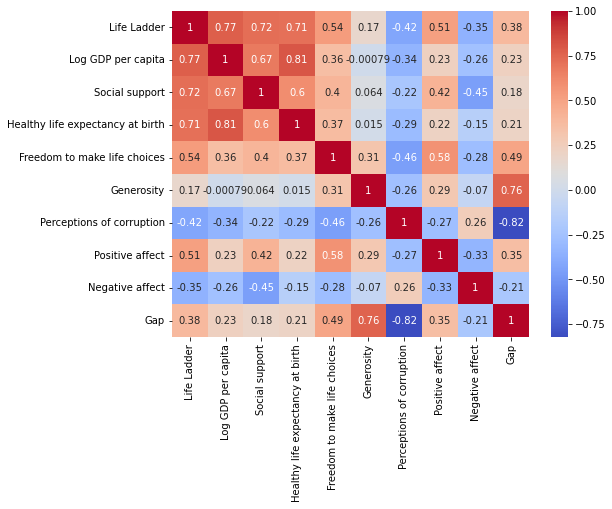

In [25]:
corr_matrix = dataset.drop(columns=['year']).corr()
# Heatmap excluding the 'year' column
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

